In [36]:
%matplotlib inline
isdark = True
import pathlib
import opticalglass
from rayoptics.environment import *
from IPython.core.display import display, HTML

class eye_opticelement():
    '''Container for optical data of eye components.'''
    def __init__(self,nF,nd,nC,
                    sourcedoi=None,
                    sourcetitle=None,
                    sourceauthors=None,
                    comment=None):
        ''' nF: ref index @ 486.1327 nm
            nd: ref index @ 587.5618 nm
            nC: ref index @ 656.2725 nm
        '''
        self.sourcedoi = sourcedoi
        self.sourcetitle = sourcetitle
        self.sourceauthors = sourceauthors
        self.nF = nF #rindex at 486nm
        self.nd = nd #rindex at 587nm
        self.nC = nC #rindex at 656nm
        self.V = opticalglass.glass.calc_glass_constants(self.nd,self.nF,self.nC)[0]
        self.comment = comment
    def source(self):
        print(self.sourcetitle)
        print(self.sourceauthors)
        display(HTML("""
        <a style='color:SeaGreen' href="http://dx.doi.org/{}">{}</a>
        """.format(self.sourcedoi,self.sourcedoi)))
        if comment is not None:
            print('Comment: {}'.format(self.comment))

sourceinfo = {'sourcedoi': '10.1016/0042-6989(82)90036-0',
'sourcetitle':'Chromatic dispersion of the ocular media',
'sourceauthors': ['Sivak, J.G.', 'Mandelman, T.']}
cornea = eye_opticelement(1.3756,1.3695,1.3675,**sourceinfo)
cornea.R1 = 7.8
cornea.R2 = 6.5

lense = eye_opticelement(1.41,1.4015,1.3983,**sourceinfo)
lense.R1 = 10.2
lense.R2 = -6.0

eyewater = eye_opticelement(1.3377,1.3339,1.3323,**sourceinfo,comment='Pig')

#Le Grand eye nonaccomodated (10.1016/j.jcrs.2018.02.024)

#anatomically wrong model, but plots 
opmA = OpticalModel()
smA  = opmA.seq_model
ospA = opmA.optical_spec

ospA.pupil = PupilSpec(osp, key=['object', 'pupil'], value=5)
ospA.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0.])
ospA.spectral_region = WvlSpec([('F', 0.5), ('d', 1.0), ('C', 0.5)], ref_wl=1)

smA.gaps[0].thi=1e10
smA.add_surface([1/cornea.R1, 0.55, cornea.nd, cornea.V])
smA.add_surface([1/cornea.R2,3.6,cornea.nd,cornea.V])
smA.add_surface([1/lense.R1,7.6,lense.nd,lense.V])
smA.add_surface([1/lense.R2,24.2-11,lense.nd,lense.V])

opmA.update_model()

#anatomically wrong model, but plots 
opmB = OpticalModel()
smB  = opmB.seq_model
ospB = opmB.optical_spec

ospB.pupil = ospA.pupil
ospB.field_of_view = ospA.field_of_view
ospB.spectral_region = ospA.spectral_region

smB.gaps[0].thi=1e10
smB.add_surface([1/cornea.R1, 0.55, cornea.nd, cornea.V])
smB.add_surface([1/cornea.R2,3.6,eyewater.nd,eyewater.V])
smB.add_surface([1/lense.R1,7.6,lense.nd,lense.V])
smB.add_surface([1/lense.R2,24.2-11,eyewater.nd,eyewater.V])

opmB.update_model()


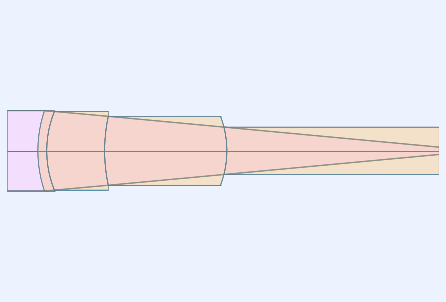

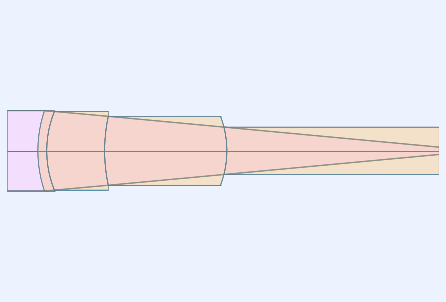

In [37]:
plt.figure(FigureClass=InteractiveLayout,opt_model=opmA, do_draw_rays=True, do_paraxial_layout=False,is_dark=False).plot()


In [38]:
plt.figure(FigureClass=InteractiveLayout,opt_model=opmB, do_draw_rays=True, do_paraxial_layout=False,is_dark=False).plot()


TypeError: object of type 'NoneType' has no len()